In [135]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats
# visualize
import seaborn as sns
import matplotlib.pyplot as plt

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

#import my modules
import acquire as a
import prepare as p
import explore as e
import model as m


# for preparation state
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Plan

# Acquire

In [2]:
df = pd.read_csv('df1_loan.csv')

In [3]:
df.head()

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         500 non-null    int64  
 1   Loan_ID            500 non-null    object 
 2   Gender             491 non-null    object 
 3   Married            497 non-null    object 
 4   Dependents         488 non-null    object 
 5   Education          500 non-null    object 
 6   Self_Employed      473 non-null    object 
 7   ApplicantIncome    500 non-null    int64  
 8   CoapplicantIncome  500 non-null    float64
 9   LoanAmount         482 non-null    float64
 10  Loan_Amount_Term   486 non-null    float64
 11  Credit_History     459 non-null    float64
 12  Property_Area      500 non-null    object 
 13  Loan_Status        500 non-null    object 
 14  Total_Income       500 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 58.7+ KB


In [5]:
a.summarize(df)

Dataframe shape: 
(500, 15)
Dataframe head: 
   Unnamed: 0   Loan_ID Gender Married Dependents Education Self_Employed  \
0           0  LP001002   Male      No          0  Graduate            No   
1           1  LP001003   Male     Yes          1  Graduate            No   
2           2  LP001005   Male     Yes          0  Graduate           Yes   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   

   Credit_History Property_Area Loan_Status Total_Income  
0             1.0         Urban           Y      $5849.0  
1             1.0         Rural           N      $6091.0  
2             1.0         Urban           Y      $3000.0  
Dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 # 

**Takeaways**
- there are 14 columns ( I will dropp unamed column)
- there are null values
-Total_income should be numeric
- rename columns

# Prepare 

In [6]:
df.columns

Index(['Unnamed: 0', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income'],
      dtype='object')

In [7]:
#drop unnamed column
df = df.drop(columns= ['Unnamed: 0'])

In [8]:
#rename columns (lowercase)
df.columns = map(str.lower, df.columns)

In [9]:
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,total_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [10]:
df.total_income.dtype

dtype('O')

In [11]:
# change type of total_income
#we need to remove $
df['total_income']= df.total_income.replace({'\$':''}, regex = True).astype('float')

In [12]:
df['total_income'].head(2)

0    5849.0
1    6091.0
Name: total_income, dtype: float64

In [13]:
df.dependents.value_counts()

0     288
1      81
2      79
3+     40
Name: dependents, dtype: int64

In [14]:
#change type in dependents
df['dependents']= df.dependents.replace({'\+':''}, regex = True).astype('float')

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            500 non-null    object 
 1   gender             491 non-null    object 
 2   married            497 non-null    object 
 3   dependents         488 non-null    float64
 4   education          500 non-null    object 
 5   self_employed      473 non-null    object 
 6   applicantincome    500 non-null    int64  
 7   coapplicantincome  500 non-null    float64
 8   loanamount         482 non-null    float64
 9   loan_amount_term   486 non-null    float64
 10  credit_history     459 non-null    float64
 11  property_area      500 non-null    object 
 12  loan_status        500 non-null    object 
 13  total_income       500 non-null    float64
dtypes: float64(6), int64(1), object(7)
memory usage: 54.8+ KB


In [16]:
#checking missing values
table = p.miss_dup_values(df)
table

Your selected dataframe has 14 columns.
There are 7 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
credit_history,41,8.2
self_employed,27,5.4
loanamount,18,3.6
loan_amount_term,14,2.8
dependents,12,2.4
gender,9,1.8
married,3,0.6


In [17]:
for i in table.index:
    print(i)
    print(df[i].value_counts())
    print('----------------')

credit_history
1.0    387
0.0     72
Name: credit_history, dtype: int64
----------------
self_employed
No     407
Yes     66
Name: self_employed, dtype: int64
----------------
loanamount
120.0    19
160.0    12
110.0    12
100.0    11
128.0     9
         ..
330.0     1
304.0     1
192.0     1
280.0     1
700.0     1
Name: loanamount, Length: 179, dtype: int64
----------------
loan_amount_term
360.0    415
180.0     35
480.0     12
300.0     12
240.0      3
120.0      3
84.0       2
60.0       2
12.0       1
36.0       1
Name: loan_amount_term, dtype: int64
----------------
dependents
0.0    288
1.0     81
2.0     79
3.0     40
Name: dependents, dtype: int64
----------------
gender
Male      400
Female     91
Name: gender, dtype: int64
----------------
married
Yes    322
No     175
Name: married, dtype: int64
----------------


I will fill nulls values
- credit_history : 0
- self_employed :0
- dependents : 0
- gender : most common Male
- married :0
- loan_term : most common 360

In [18]:
#fill the columns with 0
df[['credit_history','self_employed','dependents', 'married']] =df[['credit_history','self_employed','dependents', 'married']].fillna(0)

In [19]:
#fill gender
df.gender.fillna('Male', inplace = True)

In [26]:
#fill loan_amount_term
df.loan_amount_term.fillna(360, inplace = True)

In [29]:
p.miss_dup_values(df)

Your selected dataframe has 14 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
loanamount,18,3.6


In [25]:
#fill loanamount
df.loanamount.describe()

count    482.000000
mean     144.020747
std       82.344919
min       17.000000
25%      100.000000
50%      126.500000
75%      161.500000
max      700.000000
Name: loanamount, dtype: float64

In [22]:
# loan amount 700 it should be 700 k so I'm going to multiply by 1000

In [28]:
df['loanamount'] = df.loanamount * 1000

for this I'm going to use simple imputer after the split ( I will use mean)

In [31]:
## change the type of the columns

In [30]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print('----------------')

loan_id
LP002101    1
LP001020    1
LP002225    1
LP001052    1
LP001046    1
           ..
LP002377    1
LP002600    1
LP002494    1
LP002113    1
LP001644    1
Name: loan_id, Length: 500, dtype: int64
----------------
gender
Male      409
Female     91
Name: gender, dtype: int64
----------------
married
Yes    322
No     175
0        3
Name: married, dtype: int64
----------------
dependents
0.0    300
1.0     81
2.0     79
3.0     40
Name: dependents, dtype: int64
----------------
education
Graduate        393
Not Graduate    107
Name: education, dtype: int64
----------------
self_employed
No     407
Yes     66
0       27
Name: self_employed, dtype: int64
----------------
applicantincome
2500    8
2600    6
4166    5
4583    5
3750    5
       ..
5821    1
2750    1
2755    1
5829    1
3691    1
Name: applicantincome, Length: 415, dtype: int64
----------------
coapplicantincome
0.0       226
1666.0      5
2083.0      5
5625.0      3
1459.0      3
         ... 
1964.0      1
983.0    

In [32]:
# encode yes/no columns : loan_status, self_employed, married
df[['loan_status', 'self_employed', 'married']] = df[['loan_status', 'self_employed', 'married']].replace({'Yes': 1, 'No': 0, 'Y': 1, 'N': 0})

In [33]:
#encode gender female = 0 , male = 1
df.gender.replace({'Male': 1, 'Female': 0}, inplace = True)

In [34]:
for i in df.drop(columns = 'loan_id') .columns:
    print(i)
    print(df[i].value_counts())
    print('----------------')

gender
1    409
0     91
Name: gender, dtype: int64
----------------
married
1    322
0    178
Name: married, dtype: int64
----------------
dependents
0.0    300
1.0     81
2.0     79
3.0     40
Name: dependents, dtype: int64
----------------
education
Graduate        393
Not Graduate    107
Name: education, dtype: int64
----------------
self_employed
0    434
1     66
Name: self_employed, dtype: int64
----------------
applicantincome
2500    8
2600    6
4166    5
4583    5
3750    5
       ..
5821    1
2750    1
2755    1
5829    1
3691    1
Name: applicantincome, Length: 415, dtype: int64
----------------
coapplicantincome
0.0       226
1666.0      5
2083.0      5
5625.0      3
1459.0      3
         ... 
1964.0      1
983.0       1
830.0       1
1447.0      1
7250.0      1
Name: coapplicantincome, Length: 235, dtype: int64
----------------
loanamount
120000.0    19
110000.0    12
160000.0    12
100000.0    11
128000.0     9
            ..
164000.0     1
500000.0     1
209000.0     1

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            500 non-null    object 
 1   gender             500 non-null    int64  
 2   married            500 non-null    int64  
 3   dependents         500 non-null    float64
 4   education          500 non-null    object 
 5   self_employed      500 non-null    int64  
 6   applicantincome    500 non-null    int64  
 7   coapplicantincome  500 non-null    float64
 8   loanamount         482 non-null    float64
 9   loan_amount_term   500 non-null    float64
 10  credit_history     500 non-null    float64
 11  property_area      500 non-null    object 
 12  loan_status        500 non-null    int64  
 13  total_income       500 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 54.8+ KB


In [36]:
#create dummies

In [37]:
dummy_df = pd.get_dummies(df[['education','property_area']])

In [38]:
dummy_df.head()

,education_Graduate,education_Not Graduate,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1,0,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,0,1,0,0,1
4,1,0,0,0,1


In [39]:
#lowercase the columns
dummy_df.columns = map(str.lower, dummy_df.columns)

In [40]:
#concat 2dfs
df = pd.concat([df, dummy_df], axis=1).drop(columns = ['education', 'property_area','education_not graduate'])

In [41]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'loan_status', 'total_income',
       'education_graduate', 'property_area_rural', 'property_area_semiurban',
       'property_area_urban'],
      dtype='object')

In [42]:
df.head()

,loan_id,gender,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income,education_graduate,property_area_rural,property_area_semiurban,property_area_urban
0,LP001002,1,0,0.0,0,5849,0.0,NaN,360.0,1.0,1,5849.0,1,0,0,1
1,LP001003,1,1,1.0,0,4583,1508.0,128000.0,360.0,1.0,0,6091.0,1,1,0,0
2,LP001005,1,1,0.0,1,3000,0.0,66000.0,360.0,1.0,1,3000.0,1,0,0,1
3,LP001006,1,1,0.0,0,2583,2358.0,120000.0,360.0,1.0,1,4941.0,0,0,0,1
4,LP001008,1,0,0.0,0,6000,0.0,141000.0,360.0,1.0,1,6000.0,1,0,0,1


In [43]:
#create a new columns

In [44]:
#has_coapplicant condition
df[df.coapplicantincome > 0]

,loan_id,gender,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income,education_graduate,property_area_rural,property_area_semiurban,property_area_urban
1,LP001003,1,1,1.0,0,4583,1508.0,128000.0,360.0,1.0,0,6091.0,1,1,0,0
3,LP001006,1,1,0.0,0,2583,2358.0,120000.0,360.0,1.0,1,4941.0,0,0,0,1
5,LP001011,1,1,2.0,1,5417,4196.0,267000.0,360.0,1.0,1,9613.0,1,0,0,1
6,LP001013,1,1,0.0,0,2333,1516.0,95000.0,360.0,1.0,1,3849.0,0,0,0,1
7,LP001014,1,1,3.0,0,3036,2504.0,158000.0,360.0,0.0,0,5540.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,LP002585,1,1,0.0,0,3597,2157.0,119000.0,360.0,0.0,0,5754.0,1,1,0,0
495,LP002586,0,1,1.0,0,3326,913.0,105000.0,84.0,1.0,1,4239.0,1,0,1,0
496,LP002587,1,1,0.0,0,2600,1700.0,107000.0,360.0,1.0,1,4300.0,0,1,0,0
497,LP002588,1,1,0.0,0,4625,2857.0,111000.0,12.0,0.0,1,7482.0,1,0,0,1


In [45]:
#create a new column
df['has_coapplicant'] = 0 

In [46]:
df.head()

,loan_id,gender,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income,education_graduate,property_area_rural,property_area_semiurban,property_area_urban,has_coapplicant
0,LP001002,1,0,0.0,0,5849,0.0,NaN,360.0,1.0,1,5849.0,1,0,0,1,0
1,LP001003,1,1,1.0,0,4583,1508.0,128000.0,360.0,1.0,0,6091.0,1,1,0,0,0
2,LP001005,1,1,0.0,1,3000,0.0,66000.0,360.0,1.0,1,3000.0,1,0,0,1,0
3,LP001006,1,1,0.0,0,2583,2358.0,120000.0,360.0,1.0,1,4941.0,0,0,0,1,0
4,LP001008,1,0,0.0,0,6000,0.0,141000.0,360.0,1.0,1,6000.0,1,0,0,1,0


In [47]:
#fill new column with 1 for that condition
df.loc[df.coapplicantincome > 0, ['has_coapplicant']] = 1

In [48]:
df.head()

,loan_id,gender,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status,total_income,education_graduate,property_area_rural,property_area_semiurban,property_area_urban,has_coapplicant
0,LP001002,1,0,0.0,0,5849,0.0,NaN,360.0,1.0,1,5849.0,1,0,0,1,0
1,LP001003,1,1,1.0,0,4583,1508.0,128000.0,360.0,1.0,0,6091.0,1,1,0,0,1
2,LP001005,1,1,0.0,1,3000,0.0,66000.0,360.0,1.0,1,3000.0,1,0,0,1,0
3,LP001006,1,1,0.0,0,2583,2358.0,120000.0,360.0,1.0,1,4941.0,0,0,0,1,1
4,LP001008,1,0,0.0,0,6000,0.0,141000.0,360.0,1.0,1,6000.0,1,0,0,1,0


In [49]:
# ratio total_income divide by  dependents +1(applicant) 

In [50]:
df['income_portion_dependents'] = df.total_income/ (df.dependents +1) 

In [51]:
#split

In [52]:
train, validate, test = p.split_data(df, 'loan_status')

complete df -> (500, 18)
train -> (280, 18)
validate -> (120, 18)
test -> (100, 18)


In [53]:
#checking missing values
p.miss_dup_values(train)

Your selected dataframe has 18 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
loanamount,9,3.2


In [54]:
#using a function to impute the mean
train, validate, test = p.impute_mode(train, validate, test)

In [55]:
p.miss_dup_values(train)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [167]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,500.0,0.818000,0.386231,0.0,1.000,1.0,1.00,1.0
married,500.0,0.644000,0.479295,0.0,0.000,1.0,1.00,1.0
dependents,500.0,0.718000,1.000238,0.0,0.000,0.0,1.00,3.0
self_employed,500.0,0.132000,0.338830,0.0,0.000,0.0,0.00,1.0
applicantincome,500.0,5493.644000,6515.668972,150.0,2874.500,3854.0,5764.00,81000.0
coapplicantincome,500.0,1506.307840,2134.432188,0.0,0.000,1125.5,2253.25,20000.0
loanamount,482.0,144020.746888,82344.918722,17000.0,100000.000,126500.0,161500.00,700000.0
loan_amount_term,500.0,343.032000,62.999117,12.0,360.000,360.0,360.00,480.0
credit_history,500.0,0.774000,0.418658,0.0,1.000,1.0,1.00,1.0
loan_status,500.0,0.690000,0.462956,0.0,0.000,1.0,1.00,1.0


### PLOT VARIABLE DISTRIBUTIONS

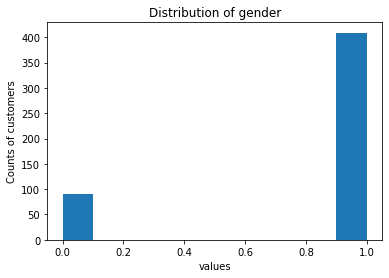

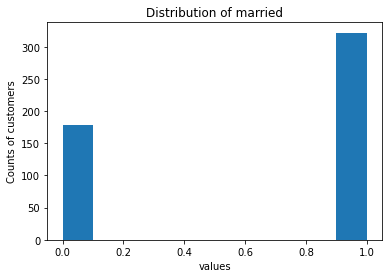

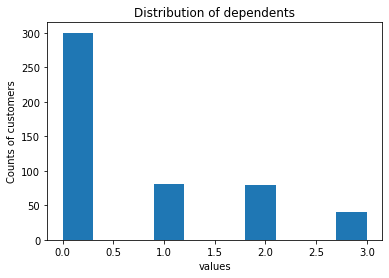

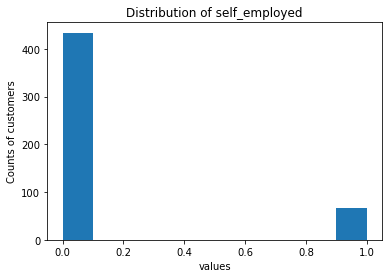

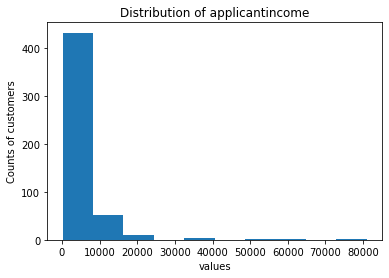

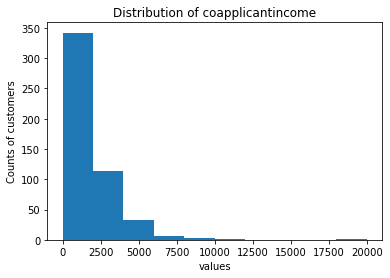

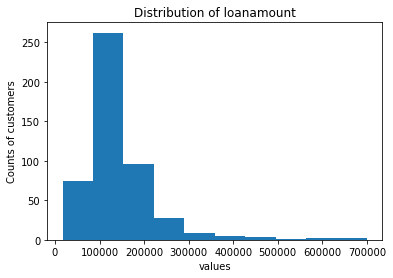

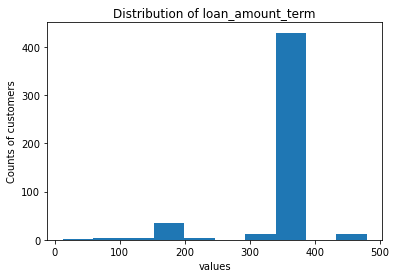

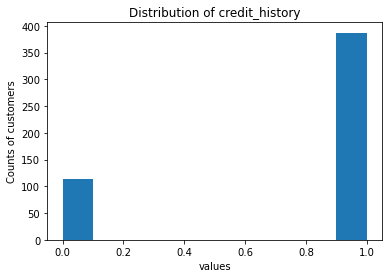

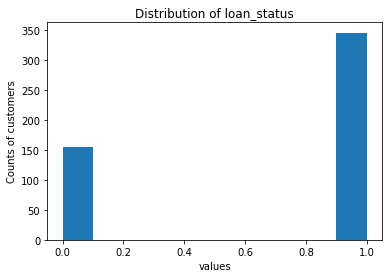

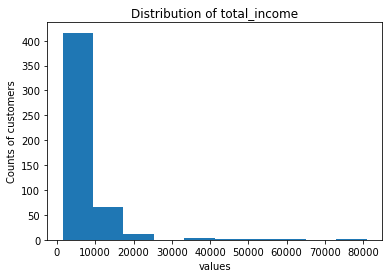

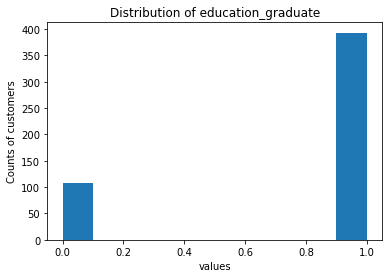

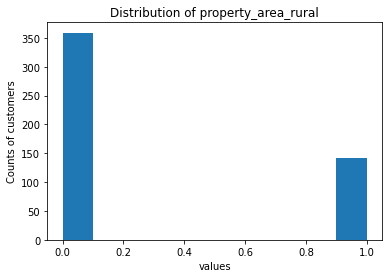

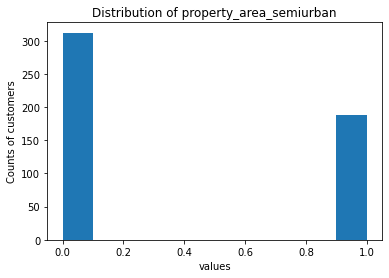

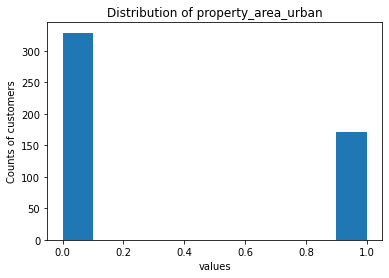

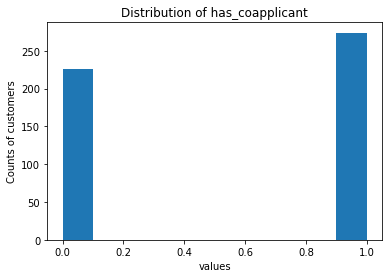

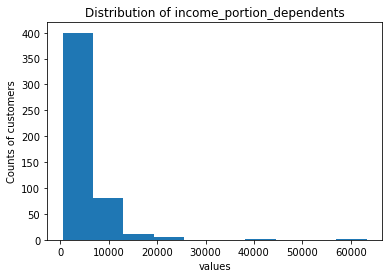

In [56]:
p.distribution(df)

In [57]:
df.columns

Index(['loan_id', 'gender', 'married', 'dependents', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'loan_status', 'total_income',
       'education_graduate', 'property_area_rural', 'property_area_semiurban',
       'property_area_urban', 'has_coapplicant', 'income_portion_dependents'],
      dtype='object')

In [58]:
cols = [ 'applicantincome', 'coapplicantincome', 'loanamount','loan_amount_term', 'total_income', 'income_portion_dependents']

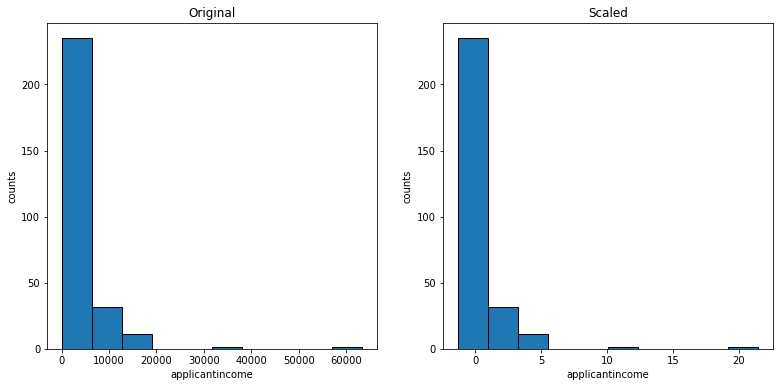

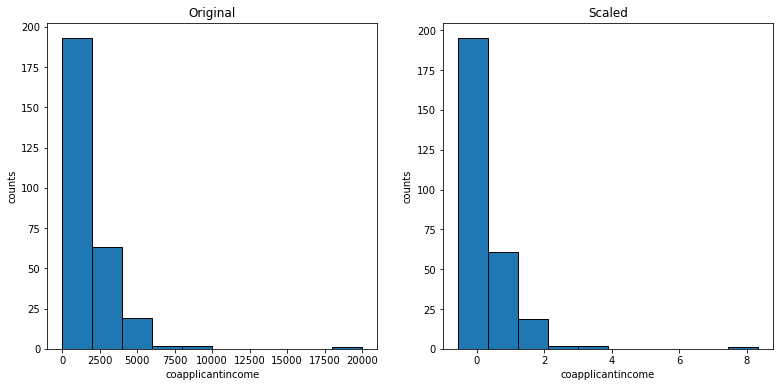

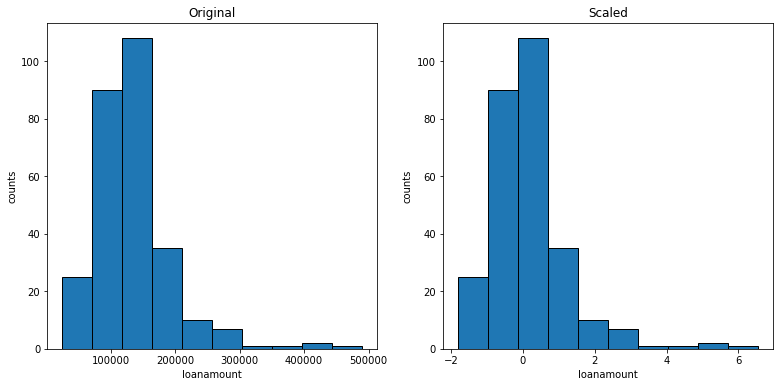

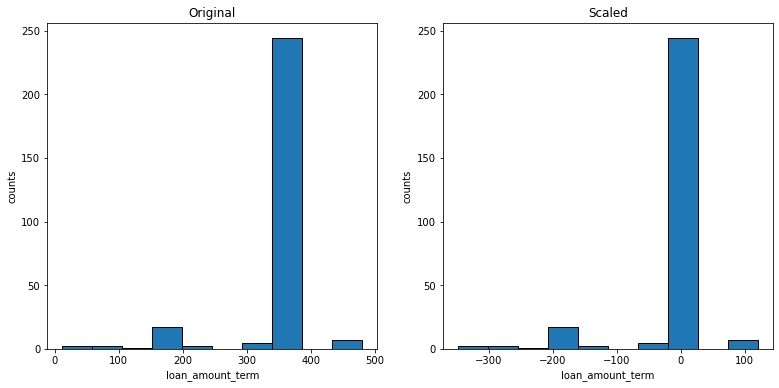

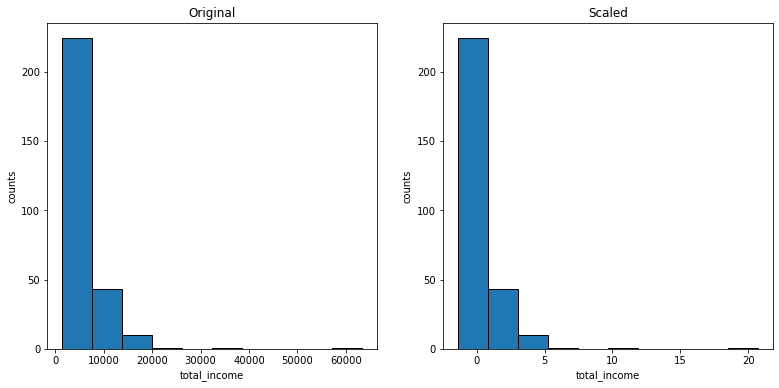

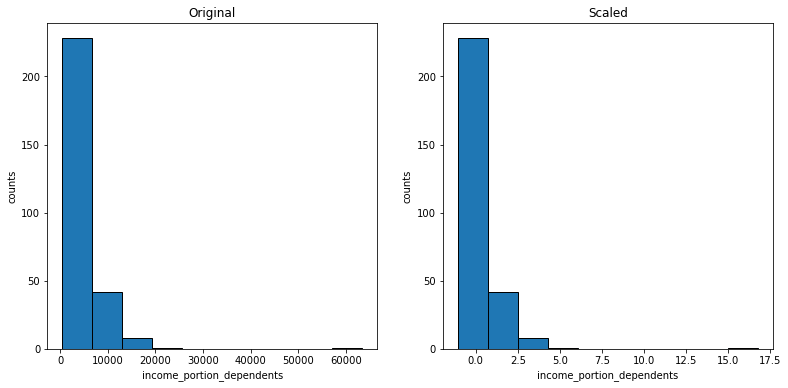

In [59]:
train_scaled, validate_scaled, test_scaled = p.scaled_df(train, validate, test, cols , RobustScaler())

Prepare :
- drop unnamed column
- rename columns(lowercase)
- remove $ and change type of total_income
- remove + and change type for dependents
    0 = no dependents
    1 = 1 dependents
    2 =  two dependents
    3 = three or more dependets
- fill nulls values

    - credit_history : 0
    - self_employed :0
    - dependents : 0
    - gender : most common Male
    - married :0
    - loan_term : most common 360
- loanamount was given in thousands so I just multiply by 1000
- encode loan_status, self_employed, married, gender
- create dummy  ('education', 'property_area) , drop 'education', 'property_area','education_not graduate']
-  create new columns:
    - has_coapplicant
    - income_portion_dependents
    
- split into train, validate and test  Test is 20\% of the original dataset, validate is .30 \*.80= 24\% of the 
    original dataset, and train is .70\*.80= 56\% 
- fill na (loanaamoun) with  simpleimputer (mean)
- Scale data using robust

# Explore

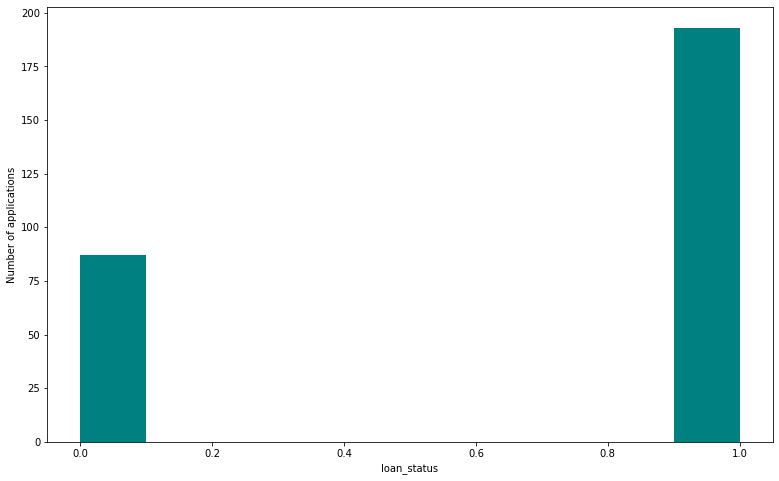

In [60]:
#  I want to start exploring  my target
plt.figure(figsize=(13, 8))
train['loan_status'].hist(grid=False, color = 'teal')
plt.xlabel("loan_status")
plt.ylabel("Number of applications")                               
#plt.xlim(-2 ,3)
plt.show()

In [61]:
train['loan_status'].mean()

0.6892857142857143

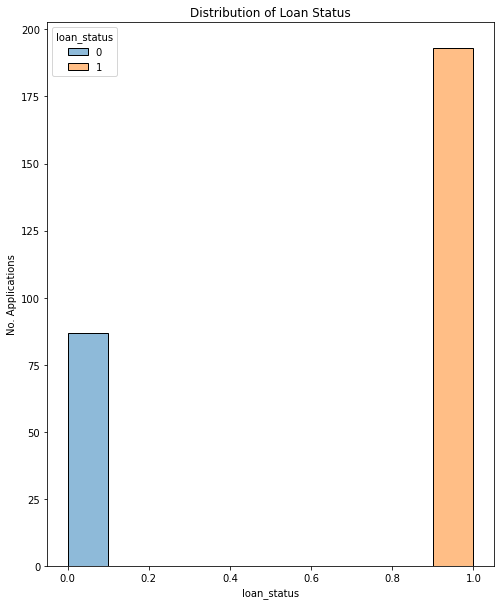

In [62]:
plt.figure(figsize=(8, 10))
sns.histplot(train,
                 x=train['loan_status'],
                 hue='loan_status',
                 multiple='layer'
                 )
plt.title("Distribution of Loan Status")
plt.xlabel('loan_status')
plt.ylabel('No. Applications')
plt.show()

### Heatmap

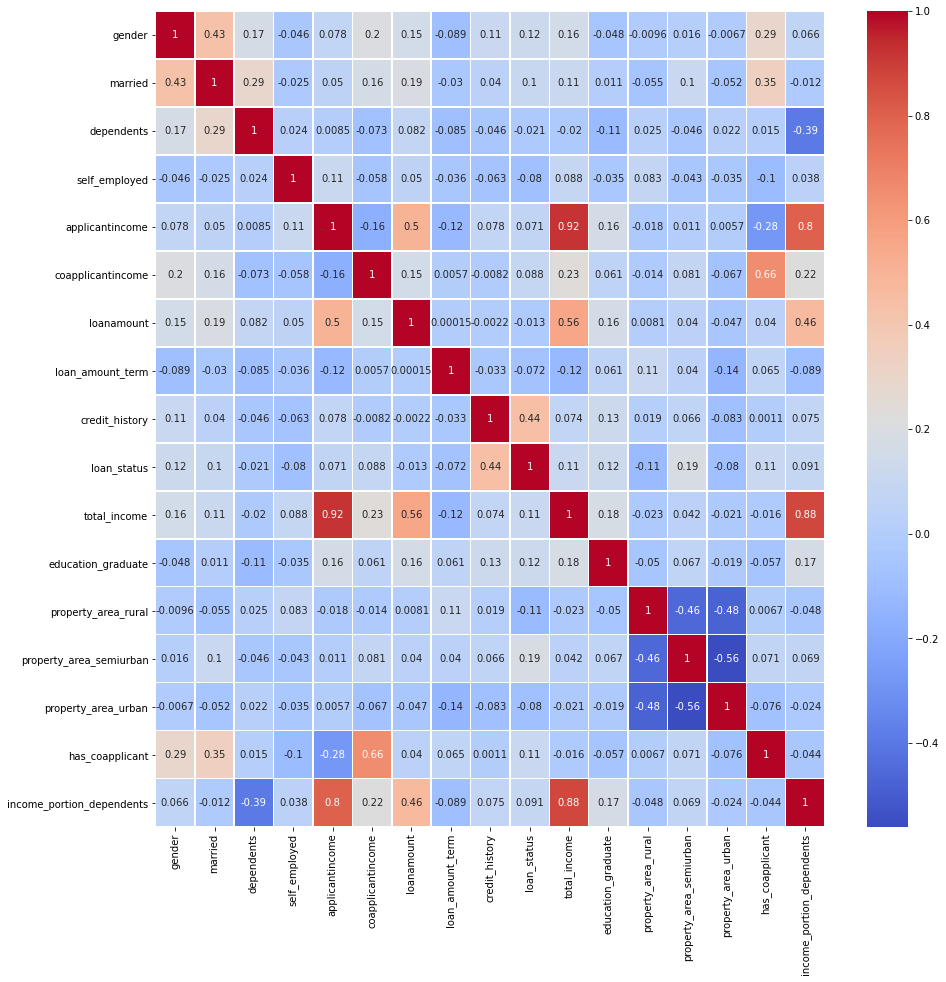

In [65]:
plt.figure(figsize=(15, 15))
sns.heatmap(train.corr(), cmap='coolwarm', annot=True, linewidth=0.5)
plt.show()

 We can see the correlation between features and features and Target
- credit_history  has the strongest correlation with our target
- total_income vs loanamount
- married vs gender
- married vs coapplicant

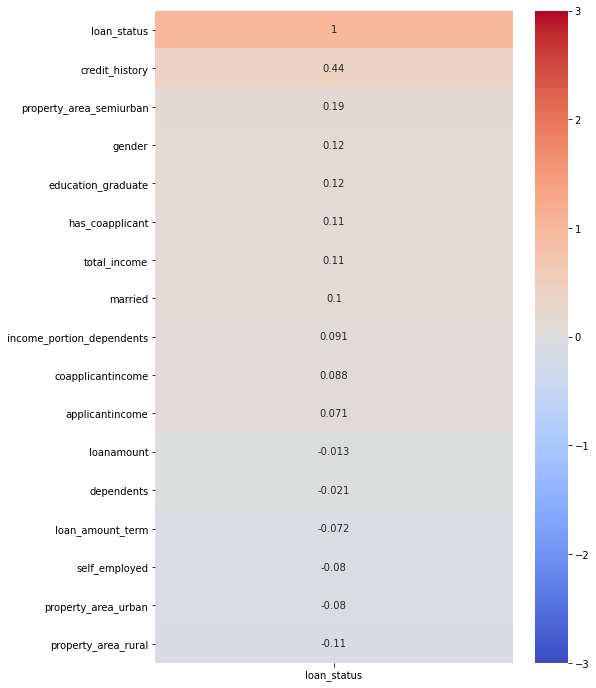

In [66]:
#let's focus on my target
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train.corr()[['loan_status']].sort_values(by='loan_status', ascending=False), vmin=-3, vmax=3, annot=True, cmap='coolwarm')

**takeways**
- we can see there is not a lot of fetaures with stonger correlation with our target. I can consider do culstering.

### Bivariate exploration

In [141]:
features = ['credit_history', 'gender','education_graduate', ]

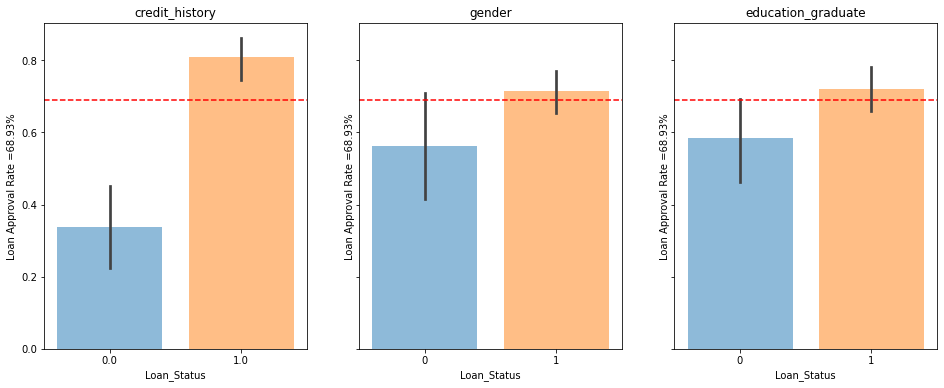

In [142]:
#use my function to plot 
e.bar_plot(features, train)

**takeaways**
- people with  credit_history are more likely to be approved for a loan
- males are more likely to be approved (but we have more males applying that women)
- graduated applicants are more likely to be approved

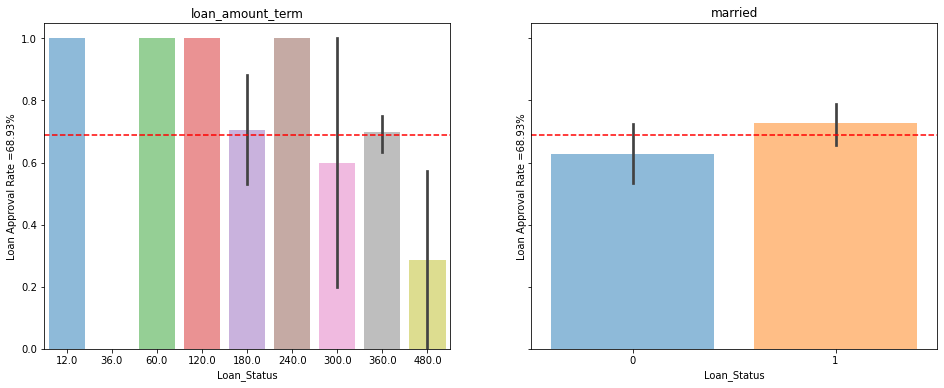

In [147]:
e.bar_plot(['loan_amount_term','married'], train)

In [152]:
train.loan_amount_term.value_counts()

360.0    244
180.0     17
480.0      7
300.0      5
60.0       2
240.0      2
12.0       1
36.0       1
120.0      1
Name: loan_amount_term, dtype: int64

**takeaways**
- loan_amount_term that are approved 100\% 12,60,120,240 months
- loan_amount_term of 480 months is the lowest rate to  be approved.

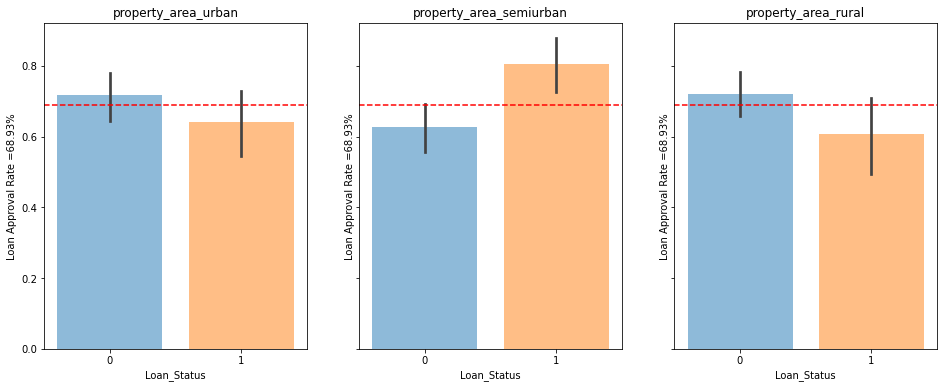

In [148]:
e.bar_plot(['property_area_urban', 'property_area_semiurban','property_area_rural'], train)

**takeaways**
- property_area_semiurban has the higher rate to be approved.

### Multivariate exploration

**total_income vs loanamount**  with no dependents

(0.0, 28000.0)

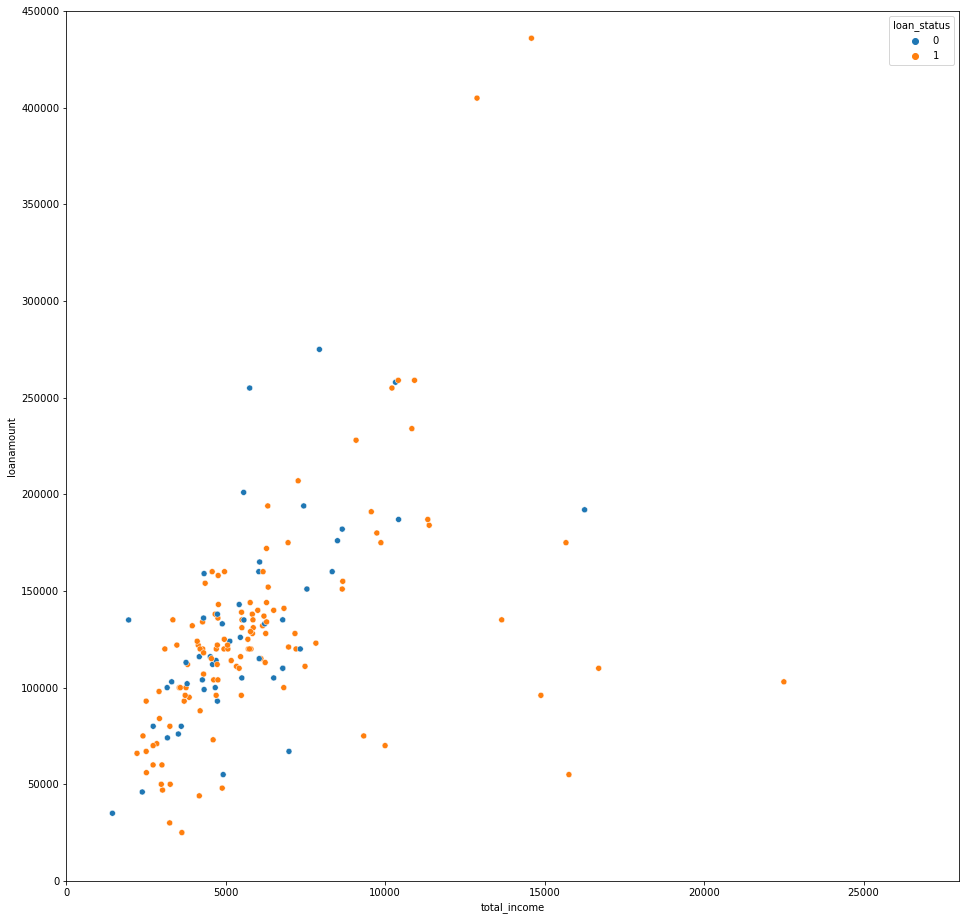

In [161]:

plt.figure(figsize= (16,16))
sns.scatterplot(x='total_income', y='loanamount', data=train[train.dependents ==0] , hue='loan_status')
plt.ylim(0,450000)
plt.xlim(0,28000)

**takeaways** no dependents
- aproved: total_income >=10, 000 and loanamount< 19000  are approved
- reject total_income <7,000 and loanamount >20,000

In [ ]:
# dependents vs total_income

(0.0, 30000.0)

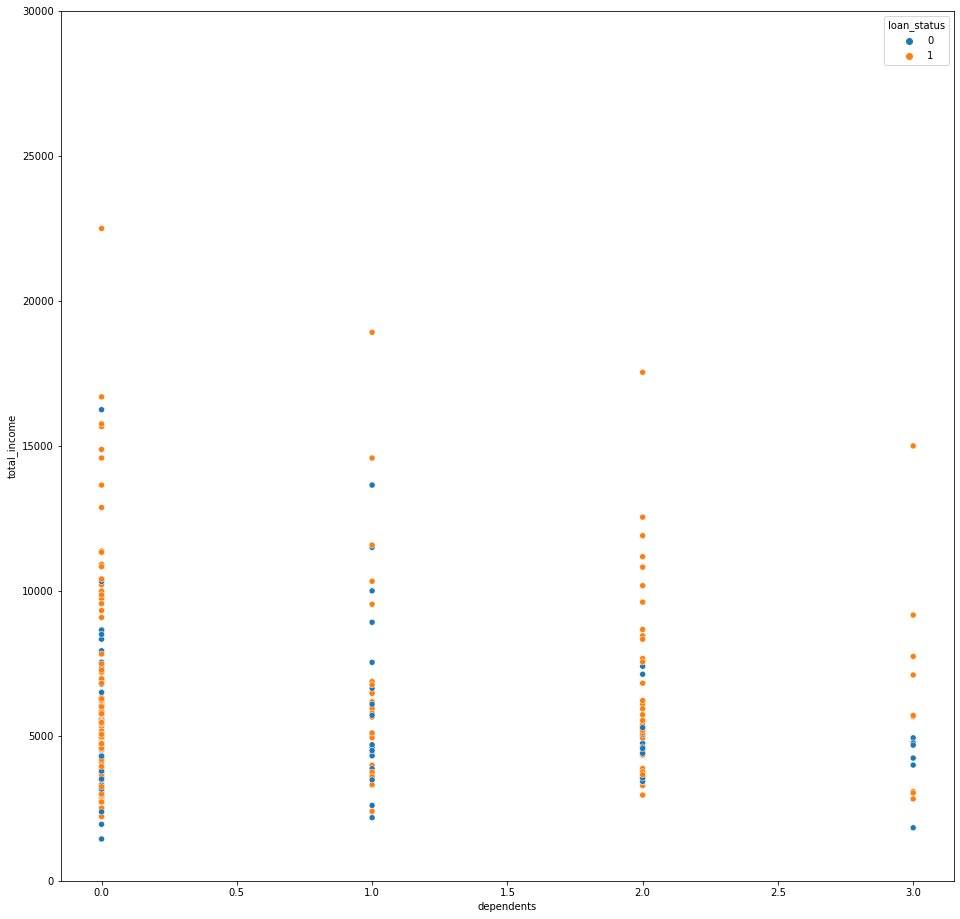

In [67]:
plt.figure(figsize= (16,16))
sns.scatterplot(x='dependents', y='total_income', data=train, hue='loan_status')
plt.ylim(0,30000)

In [ ]:
**takeways**
- I can see the botton is not approved 
- total_income > 7500 for dependets = 2 are approved
- we need to check what other factors lead to approved the loan

(0.0, 3000.0)

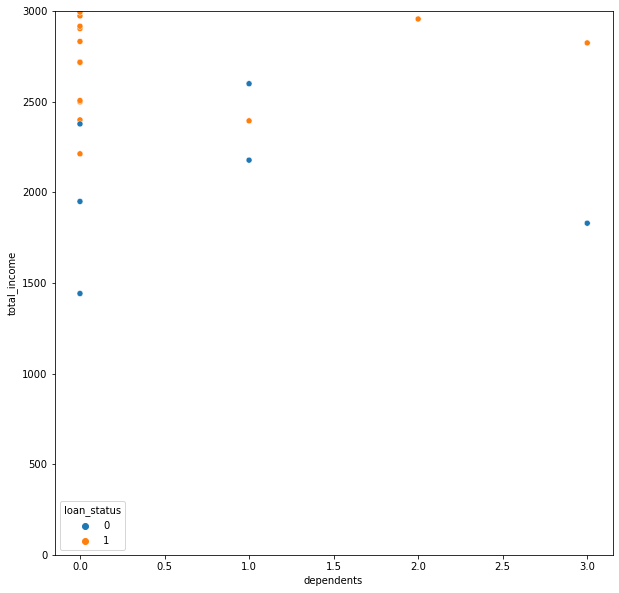

In [165]:
#let's zoom  for low total_income
plt.figure(figsize= (10,10))
sns.scatterplot(x='dependents', y='total_income', data=train, hue='loan_status')
plt.ylim(0,3000)

**takeaways**
- total_income < 2100 are not approved

(0.0, 25000.0)

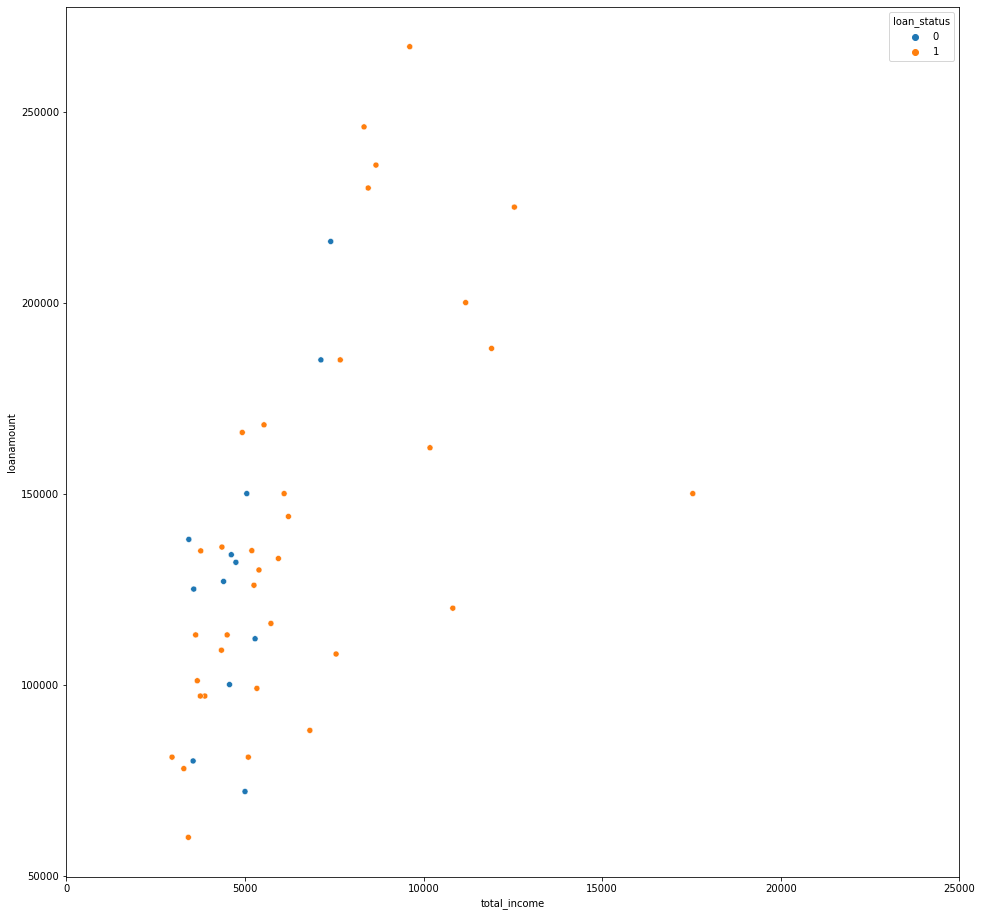

In [168]:
plt.figure(figsize= (16,16))
sns.scatterplot(x='total_income', y='loanamount', data=train[train.dependents ==2] , hue='loan_status')
# plt.ylim(0,300000)

plt.xlim(0,25000)

In [ ]:
**takeaways** dependents ==2
- tota_income >8000 are approved

In [ ]:
# Statistical Test

loan_amount_term 

- $H_o$: Rate of loan_status  is not dependent on loan_amount_term.
- $H_a$: Rate of loan_status  is  dependent on loan_amount_term.
Significance level 𝛼 = 0.05



- loan_amount_term = categorical
- loan_status = categorical
- categorical vs categorical = chi square

In [172]:
alpha = 0.05

In [173]:

observed = pd.crosstab(train.loan_amount_term, train.loan_status)
observed

loan_status,0,1
loan_amount_term,,
12.0,0,1
36.0,1,0
60.0,0,2
120.0,0,1
180.0,5,12
240.0,0,2
300.0,2,3
360.0,74,170
480.0,5,2


In [174]:
chi2, p, degf, expected =stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[  0   1]
 [  1   0]
 [  0   2]
 [  0   1]
 [  5  12]
 [  0   2]
 [  2   3]
 [ 74 170]
 [  5   2]]
---
Expected

[[  0   0]
 [  0   0]
 [  0   1]
 [  0   0]
 [  5  11]
 [  0   1]
 [  1   3]
 [ 75 168]
 [  2   4]]
---

chi^2 = 10.5173
p     = 0.2306


In [175]:
if p < alpha:
    print('We reject the null Hypothesis')
else:
    print("we fail to reject the null")

we fail to reject the null


In [ ]:
Tenure

𝐻𝑜 : There is no difference in churn rate between customers with 1 month of tenure and the customers with longer tenure
𝐻𝑎 : There is a difference in churn rate between customers with 1 month of tenure and the customers with longer tenure
Significance level $\alpha$ = 0.05

tenure_months = continous
churn = categorical
continous vs categorical = T-test, One sample T-test, 2-tailed test

# Model

In [71]:
#split my data X and y (using my function)
X_train, y_train, X_validate, y_validate, X_test, y_test = p.split_Xy (train, validate, test, 'loan_status' )

X_train -> (280, 17)               y_train->(280,)
X_validate -> (120, 17)         y_validate->(120,) 
X_test -> (100, 17)                  y_test>(100,)


**Baseline** the most frequent value of loan_status

In [72]:
#get the most frequent value.  
y_train.value_counts().nlargest(1)

1    193
Name: loan_status, dtype: int64

In [73]:
# 1. Create the object
baseline = DummyClassifier(strategy='constant', constant=1)


In [74]:
# 2. Fit the object
baseline.fit(X_train, y_train)
print(f'The baseline accuracy for loan_status in all cases on the telco Dataset is {baseline.score(X_train, y_train):.3%}')

The baseline accuracy for loan_status in all cases on the telco Dataset is 68.929%


In [75]:
# Select features 

In [76]:
#get all the columns except 
cols =X_train.columns[1:]

In [77]:
#Select_kbest

In [78]:
#from sklearn.feature_selection import SelectKBest

In [79]:
top_col = m.select_kbest (X_train[cols], y_train, 4)

The top 4 selected feautures based on the SelectKBest class are: ['gender', 'credit_history', 'education_graduate', 'property_area_semiurban']


In [80]:
top_col[:4]

['gender', 'credit_history', 'education_graduate', 'property_area_semiurban']

### Model 1 :Decision Tree

In [81]:
# create the model using select_kbest
model_dtl= DecisionTreeClassifier(max_depth=3)
# fit the model
model_dtl.fit(X_train[top_col], y_train)

# look at the model scores for training set and validate set
print(f'training score: {model_dtl.score(X_train[top_col], y_train):.2%}')
print(f'validate score: {model_dtl.score(X_validate[top_col], y_validate):.2%}')

training score: 77.14%
validate score: 77.50%


In [82]:
#RFE columns
top_rfe = m.select_rfe (X_train[cols], y_train, 4, DecisionTreeClassifier(max_depth=3))

The top 4 selected feautures based on the the RFE class class are: ['applicantincome', 'credit_history', 'total_income', 'property_area_semiurban']
applicantincome               1
credit_history                1
total_income                  1
property_area_semiurban       1
coapplicantincome             2
loan_amount_term              3
income_portion_dependents     4
has_coapplicant               5
property_area_urban           6
property_area_rural           7
education_graduate            8
loanamount                    9
self_employed                10
dependents                   11
married                      12
gender                       13
dtype: int64


In [83]:
# create the model with RFE columns
model_dt2= DecisionTreeClassifier(max_depth=4)
# fit the model
model_dt2.fit(X_train[top_rfe], y_train)

# look at the model scores for training set and validate set
print(f'training score: {model_dt2.score(X_train[top_rfe], y_train):.2%}')
print(f'validate score: {model_dt2.score(X_validate[top_rfe], y_validate):.2%}')

training score: 80.71%
validate score: 72.50%


**takeaways**
- best model : model_dtl

    -training score: 77.14\%  
    -validate score: 77.50\%

###  Model 2 : Random Forest

In [84]:
# create the Random Forest Model using all columns
model_rf1 = RandomForestClassifier(min_samples_leaf=8, max_depth=6, random_state=1349, max_features= 7)
# fit the thing
model_rf1.fit(X_train[cols], y_train)
# look at the model scores for training set and validate set
print(f'training score: {model_rf1.score(X_train[cols], y_train):.2%}')
print(f'validate score: {model_rf1.score(X_validate[cols], y_validate):.2%}')

training score: 81.43%
validate score: 77.50%


In [85]:
#Seleck_kbest

In [86]:
# create the Random Forest Model
model_rf2 = RandomForestClassifier(min_samples_leaf=8, max_depth=6, random_state=1349)
# fit the thing
model_rf2.fit(X_train[top_col], y_train)
# look at the model scores for training set and validate set
print(f'training score: {model_rf2.score(X_train[top_col], y_train):.2%}')
print(f'validate score: {model_rf2.score(X_validate[top_col], y_validate):.2%}')

training score: 77.14%
validate score: 77.50%


In [87]:
#RFE

In [88]:

top_rfe = m.select_rfe (X_train[cols], y_train, 4, RandomForestClassifier(min_samples_leaf=3, max_depth=6, random_state=1349))

The top 4 selected feautures based on the the RFE class class are: ['applicantincome', 'credit_history', 'total_income', 'income_portion_dependents']
applicantincome               1
credit_history                1
total_income                  1
income_portion_dependents     1
loanamount                    2
coapplicantincome             3
property_area_semiurban       4
gender                        5
dependents                    6
loan_amount_term              7
education_graduate            8
property_area_rural           9
has_coapplicant              10
married                      11
self_employed                12
property_area_urban          13
dtype: int64


In [89]:
# create the Random Forest Model
model_rf3 = RandomForestClassifier(min_samples_leaf=4, max_depth=6, random_state=1349)
# fit the thing
model_rf3.fit(X_train[top_rfe], y_train)
# look at the model scores for training set and validate set
print(f'training score: {model_rf3.score(X_train[top_rfe], y_train):.2%}')
print(f'validate score: {model_rf3.score(X_validate[top_rfe], y_validate):.2%}')

training score: 82.86%
validate score: 76.67%


**takeaways**
- best model : model_rf2

    -training score: 77.14\%  
    -validate score: 77.50\%

###  Model 3 : KNN

In [90]:
#getting the best k value with all columns
for k in range(29, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[cols], y_train)
    acc_t = knn.score(X_train[cols], y_train)
    acc_v = knn.score(X_validate[cols], y_validate )
    if (acc_t - acc_v)< .05 :
        print(f'Model: {k} when k is {k}')
        print(f'training score: {knn.score(X_train[cols], y_train):.2%}')
        print(f'validate score: {knn.score(X_validate[cols], y_validate):.2%}')
        print('__________________________________________________________')

Model: 29 when k is 29
training score: 69.29%
validate score: 69.17%
__________________________________________________________
Model: 30 when k is 30
training score: 70.00%
validate score: 69.17%
__________________________________________________________
Model: 31 when k is 31
training score: 68.93%
validate score: 69.17%
__________________________________________________________
Model: 32 when k is 32
training score: 69.29%
validate score: 69.17%
__________________________________________________________
Model: 33 when k is 33
training score: 68.93%
validate score: 69.17%
__________________________________________________________
Model: 34 when k is 34
training score: 68.93%
validate score: 69.17%
__________________________________________________________
Model: 35 when k is 35
training score: 68.93%
validate score: 69.17%
__________________________________________________________
Model: 36 when k is 36
training score: 68.93%
validate score: 69.17%
___________________________________

best value is k = 35

In [91]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train[cols], y_train)
print(f'training score: {knn.score(X_train[cols], y_train):.2%}')
print(f'validate score: {knn.score(X_validate[cols], y_validate):.2%}')

training score: 68.93%
validate score: 69.17%


In [92]:
#select kbest
for k in range(5,20):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[top_col], y_train)
    acc_t = knn.score(X_train[top_col], y_train)
    acc_v = knn.score(X_validate[top_col], y_validate )
    if (acc_t - acc_v)< .05 :
        print(f'Model: {k} when k is {k}')
        print(f'training score: {knn.score(X_train[top_col], y_train):.2%}')
        print(f'validate score: {knn.score(X_validate[top_col], y_validate):.2%}')
        print('__________________________________________________________')

Model: 5 when k is 5
training score: 76.43%
validate score: 77.50%
__________________________________________________________
Model: 6 when k is 6
training score: 76.79%
validate score: 77.50%
__________________________________________________________
Model: 7 when k is 7
training score: 76.43%
validate score: 77.50%
__________________________________________________________
Model: 8 when k is 8
training score: 73.93%
validate score: 74.17%
__________________________________________________________
Model: 9 when k is 9
training score: 73.57%
validate score: 75.00%
__________________________________________________________
Model: 10 when k is 10
training score: 73.21%
validate score: 74.17%
__________________________________________________________
Model: 11 when k is 11
training score: 75.71%
validate score: 77.50%
__________________________________________________________
Model: 12 when k is 12
training score: 75.71%
validate score: 77.50%
_____________________________________________

In [93]:
# I will select 15 because is the less number of k

In [94]:
knn2 = KNeighborsClassifier(n_neighbors=15)
knn2.fit(X_train[top_col], y_train)
print(f'training score: {knn2.score(X_train[top_col], y_train):.2%}')
print(f'validate score: {knn2.score(X_validate[top_col], y_validate):.2%}')

training score: 76.79%
validate score: 78.33%


**takeaways**
- best model : knn2

    -training score: 76.79\%  
    -validate score: 78.33\%

### Logistic Regression

In [95]:
#model with all the columns
model_lr1 =LogisticRegression(C=1.0 , random_state=123)
model_lr1.fit(X_train[cols], y_train)
print(f'training score: {model_lr1.score(X_train[cols], y_train):.2%}')
print(f'validate score: {model_lr1.score(X_validate[cols], y_validate):.2%}')

training score: 68.93%
validate score: 69.17%


In [96]:
#select kbest
model_lr2 =LogisticRegression()
model_lr2.fit(X_train[top_col], y_train)
print(f'training score: {model_lr2.score(X_train[top_col], y_train):.2%}')
print(f'validate score: {model_lr2.score(X_validate[top_col], y_validate):.2%}')

training score: 76.79%
validate score: 73.33%


In [117]:
#RFE
top_rfe = m.select_rfe (X_train[cols], y_train,6, LogisticRegression())

The top 6 selected feautures based on the the RFE class class are: ['gender', 'married', 'credit_history', 'education_graduate', 'property_area_semiurban', 'has_coapplicant']
gender                        1
married                       1
credit_history                1
education_graduate            1
property_area_semiurban       1
has_coapplicant               1
loan_amount_term              2
total_income                  3
applicantincome               4
coapplicantincome             5
loanamount                    6
property_area_rural           7
self_employed                 8
dependents                    9
property_area_urban          10
income_portion_dependents    11
dtype: int64


In [118]:
model_lr2 =LogisticRegression()
model_lr2.fit(X_train[top_rfe], y_train)
print(f'training score: {model_lr2.score(X_train[top_rfe], y_train):.2%}')
print(f'validate score: {model_lr2.score(X_validate[top_rfe], y_validate):.2%}')

training score: 76.43%
validate score: 76.67%


**takeaways**
- best model : model_lr2

    -training score: 76.43\%  
    -validate score: 76.67\%

In [119]:
#select my best models : model_lr2,  knn2
m.model_performs (X_validate[top_rfe], y_validate,model_lr2)


    The accuracy for our model is 76.6667%
    The True Positive Rate is 93.976%,    The False Positive Rate is 62.162%,
    The True Negative Rate is 37.838%,    The False Negative Rate is 6.024%
    ________________________________________________________________________________
    

    The positive is  'Loan Approved '
    Confusion Matrix
    


,pred_no_approved,pred_approved
actual_no_approved,True Negative: 14,False positive: 23
actual_approved,False Negative: 5,True Positive: 78



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
No Aproved,0.736842,0.378378,0.500000,37.000000
Approved,0.772277,0.939759,0.847826,83.000000
accuracy,0.766667,0.766667,0.766667,0.766667
macro avg,0.754560,0.659069,0.673913,120.000000
weighted avg,0.761351,0.766667,0.740580,120.000000


In [120]:
m.model_performs(X_validate[top_col], y_validate,knn2)


    The accuracy for our model is 78.3333%
    The True Positive Rate is 91.566%,    The False Positive Rate is 51.351%,
    The True Negative Rate is 48.649%,    The False Negative Rate is 8.434%
    ________________________________________________________________________________
    

    The positive is  'Loan Approved '
    Confusion Matrix
    


,pred_no_approved,pred_approved
actual_no_approved,True Negative: 18,False positive: 19
actual_approved,False Negative: 7,True Positive: 76



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
No Aproved,0.720000,0.486486,0.580645,37.000000
Approved,0.800000,0.915663,0.853933,83.000000
accuracy,0.783333,0.783333,0.783333,0.783333
macro avg,0.760000,0.701075,0.717289,120.000000
weighted avg,0.775333,0.783333,0.769669,120.000000


In [121]:
#test my best model

In [122]:
m.model_performs(X_test[top_col], y_test,knn2)


    The accuracy for our model is 74.0000%
    The True Positive Rate is 92.754%,    The False Positive Rate is 67.742%,
    The True Negative Rate is 32.258%,    The False Negative Rate is 7.246%
    ________________________________________________________________________________
    

    The positive is  'Loan Approved '
    Confusion Matrix
    


,pred_no_approved,pred_approved
actual_no_approved,True Negative: 10,False positive: 21
actual_approved,False Negative: 5,True Positive: 64



    ________________________________________________________________________________
    
    Classification Report:
    


,precision,recall,f1-score,support
No Aproved,0.666667,0.322581,0.434783,31.00
Approved,0.752941,0.927536,0.831169,69.00
accuracy,0.740000,0.740000,0.740000,0.74
macro avg,0.709804,0.625058,0.632976,100.00
weighted avg,0.726196,0.740000,0.708289,100.00
